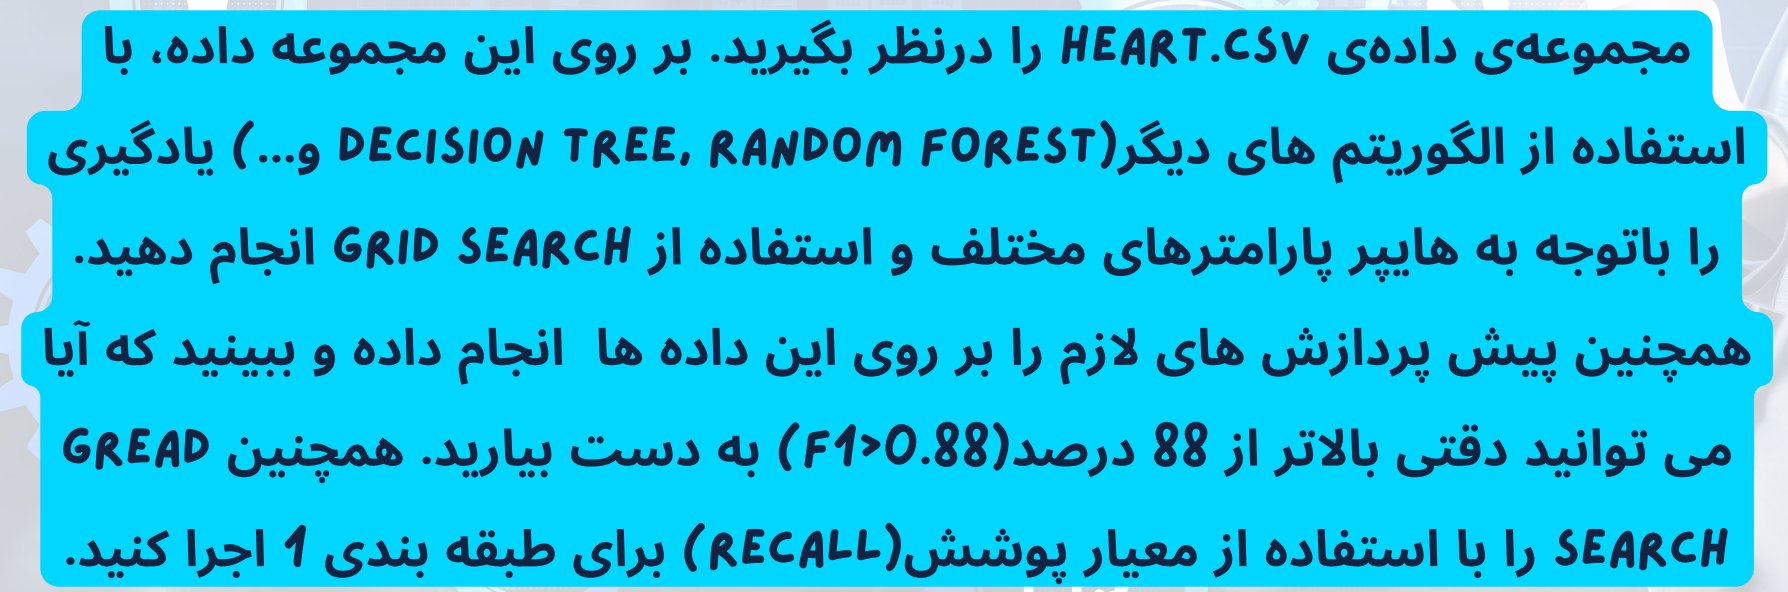

# **import Libraries**

In [52]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn import metrics

%matplotlib inline

In [2]:
pd.set_option('display.max_columns', 30)

# **Load Data**

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Filoger/tamrin_quera/ML/Classification/heart.csv")

# **Dataset Overview**

> **Introduction:**
- In this notebook, we intend to analyze data related to cardiac features of patients from the "heart.csv" dataset. This dataset provides various information about patients, including age, gender, blood pressure, cholesterol levels, electrocardiographic (ECG) features, and more.

**Dataset Information:**

This dataset includes the following features:

- age: The age of the patient.
- sex: Gender of the patient (0: female, 1: male).
- cp: Type of chest pain:

        0: No chest pain
        1: Typical angina (chest pain related to reduced blood flow to the heart)
        2: Atypical angina (non-anginal chest pain)
        3: Non-anginal pain (non-cardiac chest pain)

- trestbps: Resting blood pressure.
- chol: Serum cholesterol.
- fbs: Fasting blood sugar > 120 mg/dl.
- restecg: Resting electrocardiographic results.
- thalach: Maximum heart rate achieved.
- exang: Exercise induced angina.
- oldpeak: ST depression induced by exercise relative to rest
- slope: Slope of the peak exercise ST segment:

        0: Upsloping
        1: Flat
        2: Downsloping

- ca: Number of major vessels colored by fluoroscopy (the number of vessels colored with dye, an indication of heart problems).

- thal: Thalassemia test result:

        1: Normal
        2: Fixed defect
        3: Reversable defect

- target: Presence or absence of heart disease (0: No heart disease, 1: Presence of heart disease)

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [6]:
row, col = df.shape
print(f"Number of Row: {row}")
print(f"Number of Columns: {col}")

Number of Row: 303
Number of Columns: 14


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

# **EDA**

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

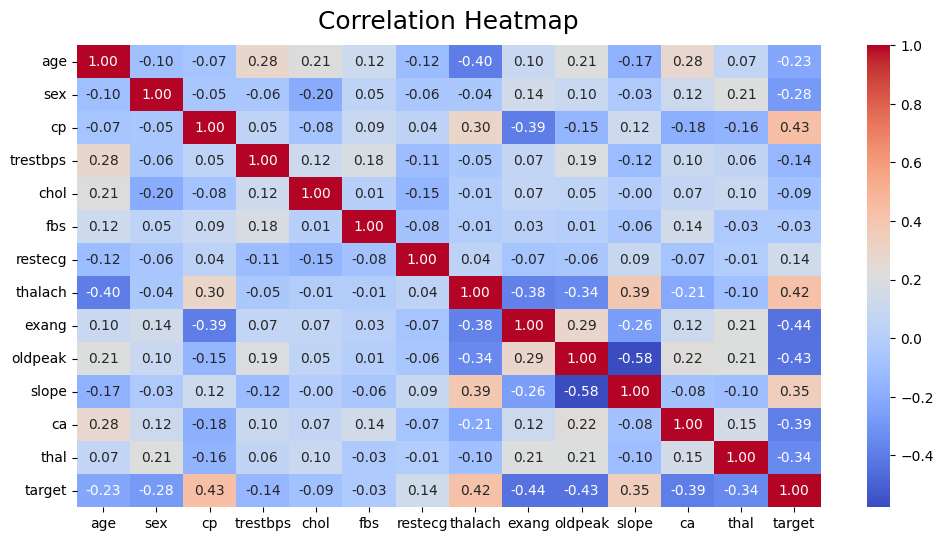

In [11]:

plt.figure(figsize=(12, 6))
heatmap = sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

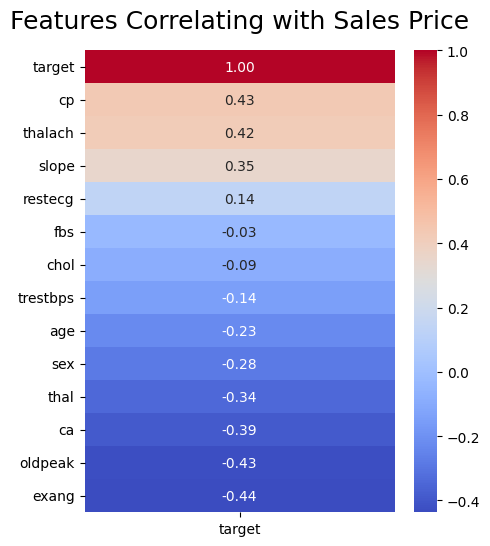

In [12]:
plt.figure(figsize=(5, 6))
heatmap = sns.heatmap(df.corr()[["target"]].sort_values(by="target", ascending=False),
                      annot=True, cmap='coolwarm', fmt=".2f"
)
heatmap.set_title('Features Correlating with Sales Price', fontdict={'fontsize':18}, pad=16);

In [13]:
def plot_distributions(data, color='blue'):
    """
    This function takes a pandas DataFrame as input and plots the distribution of each feature
    in a single figure. The number of rows and columns in the figure is determined dynamically
    based on the number of features in the DataFrame. The "darkgrid" theme from seaborn is applied
    to the plots. You can specify a color for the bars in the histogram by passing a "color" parameter.
    """
    sns.set_theme(style='whitegrid')  # set the seaborn theme

    num_cols = 3  # set the number of columns per row
    num_features = len(data.columns)
    num_rows = math.ceil(num_features / num_cols)

    fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 5*num_rows))

    for i, column in enumerate(data.columns):
        row = i // num_cols
        col = i % num_cols
        axs[row][col].hist(data[column], bins=30, alpha=0.5, color=color)
        axs[row][col].set_title(f'Distribution of {column}')
        axs[row][col].set_xlabel(column)
        axs[row][col].set_ylabel('Frequency')

    fig.tight_layout(pad=2.0)
    plt.show

In [14]:
selected_col_hist = [
    "age",
    "trestbps",
    "chol",
    "thalach",
    "oldpeak"
]

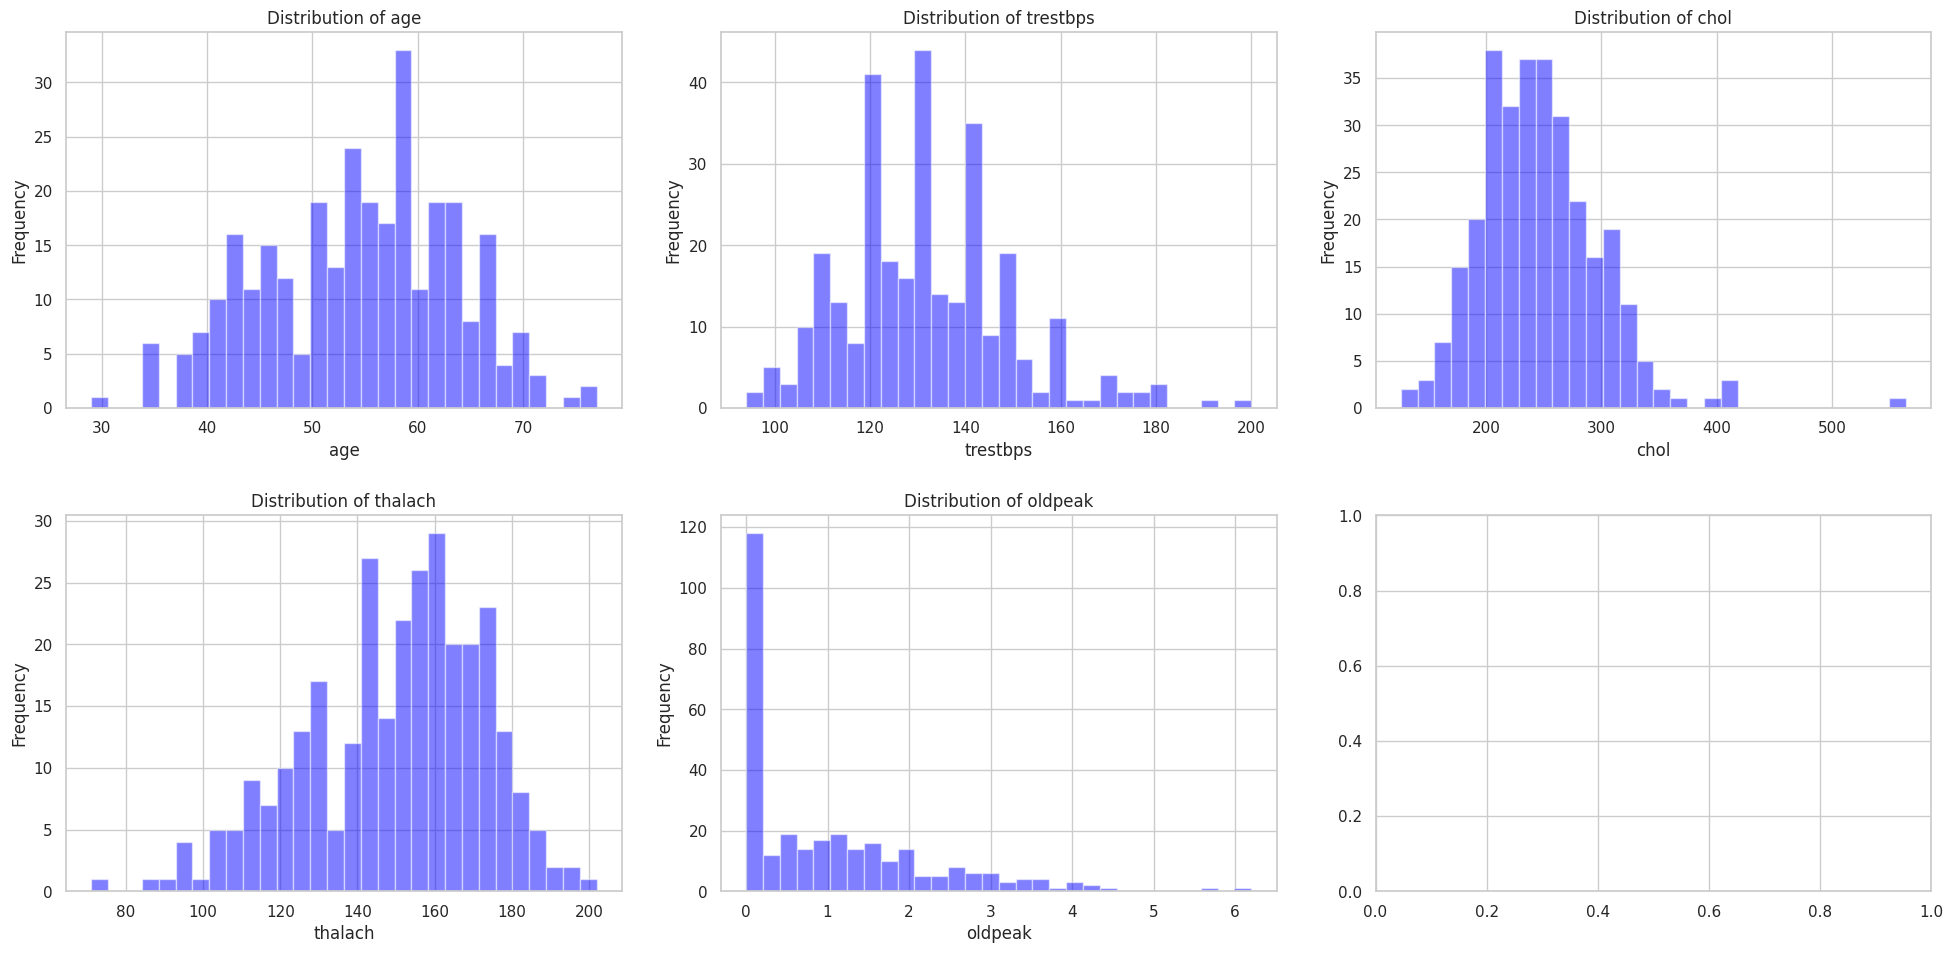

In [15]:
plot_distributions(df[selected_col_hist])

In [16]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

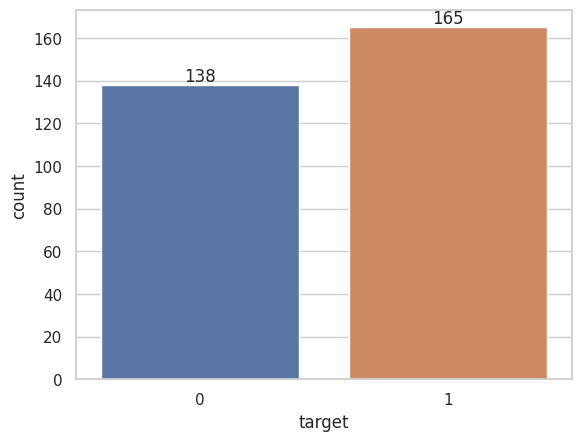

In [17]:
plt.subplot()
ax = sns.countplot(data=df, x="target")
ax.bar_label(ax.containers[0]);

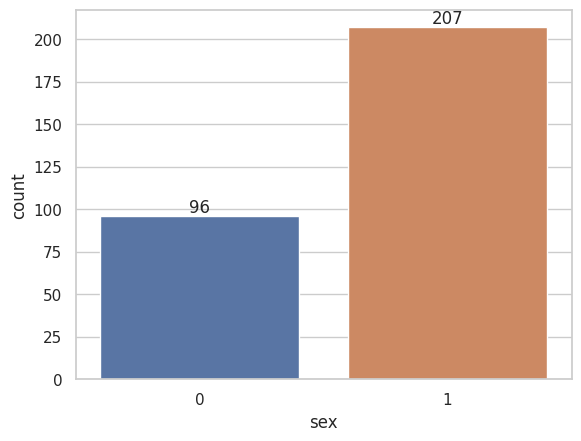

In [18]:
plt.subplot()
ax = sns.countplot(data=df, x="sex")
ax.bar_label(ax.containers[0]);

In [19]:
df.groupby('sex')['target'].mean()

sex
0    0.750000
1    0.449275
Name: target, dtype: float64

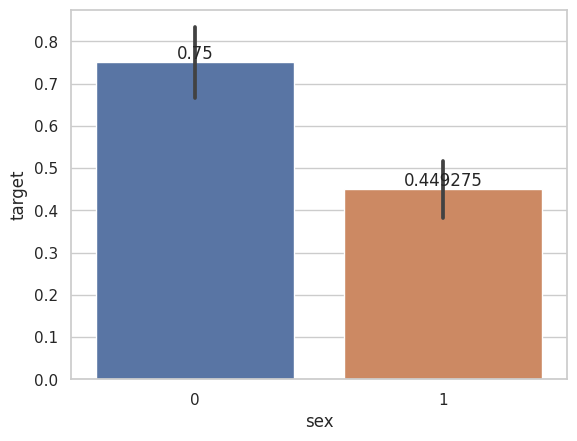

In [20]:
plt.subplot()
ax = sns.barplot(data=df, x="sex", y="target")
ax.bar_label(ax.containers[0]);

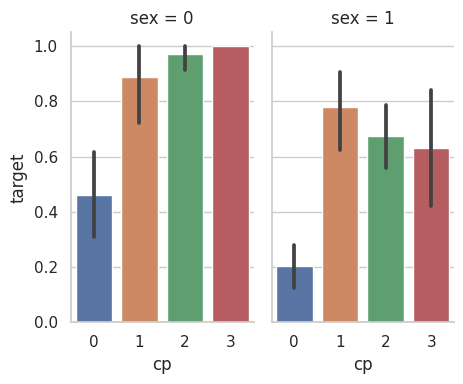

In [21]:
sns.catplot(
    data=df, x="cp", y="target", col="sex",
    kind="bar", height=4, aspect=.6,
)

# **Preprocessing**

In [22]:
missing_val = pd.DataFrame(df.isna().sum() / df.shape[0], columns=["pct_missing"])
missing_val["number_of_missing"] = df.isna().sum()
missing_val.style.background_gradient()

,pct_missing,number_of_missing
age,0.000000,0
sex,0.000000,0
cp,0.000000,0
trestbps,0.000000,0
chol,0.000000,0
fbs,0.000000,0
restecg,0.000000,0
thalach,0.000000,0
exang,0.000000,0
oldpeak,0.000000,0


In [23]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [24]:
df["slope"].unique()

array([0, 2, 1])

In [25]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [26]:
print(X)

[[63.  1.  3. ...  0.  0.  1.]
 [37.  1.  2. ...  0.  0.  2.]
 [41.  0.  1. ...  2.  0.  2.]
 ...
 [68.  1.  0. ...  1.  2.  3.]
 [57.  1.  0. ...  1.  1.  3.]
 [57.  0.  1. ...  1.  1.  2.]]


In [27]:
ct = ColumnTransformer([
    ("slope", OneHotEncoder(), [10]),
], remainder="passthrough")
X = ct.fit_transform(X)
print(X)

[[1.  0.  0.  ... 2.3 0.  1. ]
 [1.  0.  0.  ... 3.5 0.  2. ]
 [0.  0.  1.  ... 1.4 0.  2. ]
 ...
 [0.  1.  0.  ... 3.4 2.  3. ]
 [0.  1.  0.  ... 1.2 1.  3. ]
 [0.  1.  0.  ... 0.  1.  2. ]]


In [28]:
ss = StandardScaler()
X = ss.fit_transform(X)
X

array([[ 3.66450153, -0.92676626, -0.93914194, ...,  1.08733806,
        -0.71442887, -2.14887271],
       [ 3.66450153, -0.92676626, -0.93914194, ...,  2.12257273,
        -0.71442887, -0.51292188],
       [-0.27288841, -0.92676626,  1.06480177, ...,  0.31091206,
        -0.71442887, -0.51292188],
       ...,
       [-0.27288841,  1.07902072, -0.93914194, ...,  2.03630317,
         1.24459328,  1.12302895],
       [-0.27288841,  1.07902072, -0.93914194, ...,  0.13837295,
         0.26508221,  1.12302895],
       [-0.27288841,  1.07902072, -0.93914194, ..., -0.89686172,
         0.26508221, -0.51292188]])

## Modeling

## Decision Tree

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=380)

In [30]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [31]:
y_pred = dtree.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.79      0.74        33
           1       0.82      0.74      0.78        43

    accuracy                           0.76        76
   macro avg       0.76      0.77      0.76        76
weighted avg       0.77      0.76      0.76        76



## KNeighborsClassifier

In [32]:
knn_clf = KNeighborsClassifier(n_neighbors=7)
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [33]:
y_pred = knn_clf.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.79      0.83        33
           1       0.85      0.91      0.88        43

    accuracy                           0.86        76
   macro avg       0.86      0.85      0.85        76
weighted avg       0.86      0.86      0.85        76



## SVC

In [34]:
clf = SVC(C=15, kernel='linear', random_state=3244)
clf.fit(X_train, y_train)

SVC(C=15, kernel='linear', random_state=3244)

In [35]:
y_pred = clf.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.79      0.81        33
           1       0.84      0.88      0.86        43

    accuracy                           0.84        76
   macro avg       0.84      0.84      0.84        76
weighted avg       0.84      0.84      0.84        76



In [76]:
params = {
    'C': [1, 2, 3, 5, 10, 15],
    'kernel': ['linear', 'rbf'],
    'gamma': ['auto', 0.1, 0.5]
}
gsh = GridSearchCV(SVC(), param_grid=params, scoring='accuracy', cv=7, n_jobs=-1, verbose=10)
gsh.fit(X_train, y_train)

Fitting 7 folds for each of 36 candidates, totalling 252 fits


GridSearchCV(cv=7, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [1, 2, 3, 5, 10, 15], 'gamma': ['auto', 0.1, 0.5],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy', verbose=10)

In [73]:
gsh.best_estimator_

SVC(C=1, gamma='auto')

In [77]:
gsh.best_score_

0.8322510822510824

In [78]:
gsh.best_params_

{'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}

## Random Forest

In [36]:
rf_clf = RandomForestClassifier(n_estimators=1000, bootstrap=True, oob_score=True)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000, oob_score=True)

In [37]:
y_pred = rf_clf.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        33
           1       0.84      0.84      0.84        43

    accuracy                           0.82        76
   macro avg       0.81      0.81      0.81        76
weighted avg       0.82      0.82      0.82        76



In [ ]:
params = {
    'C': [1, 2, 3, 5, 10, 15],
    'kernel': ['linear', 'rbf'],
    'gamma': ['auto', 0.1, 0.5]
}
gsh = GridSearchCV(SVC(), param_grid=params, scoring='accuracy', cv=7, n_jobs=-1, verbose=10)
gsh.fit(X_train, y_train)

## AdaBoost

In [49]:
ada_clf = AdaBoostClassifier(base_estimator=SVC(probability=True, kernel='rbf'), n_estimators=1000)
ada_clf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostClassifier(base_estimator=SVC(probability=True), n_estimators=1000)

In [50]:
y_pred = ada_clf.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.79      0.84        33
           1       0.85      0.93      0.89        43

    accuracy                           0.87        76
   macro avg       0.87      0.86      0.86        76
weighted avg       0.87      0.87      0.87        76

